Gaussian blur

In [9]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

(-0.5, 299.5, 167.5, -0.5)

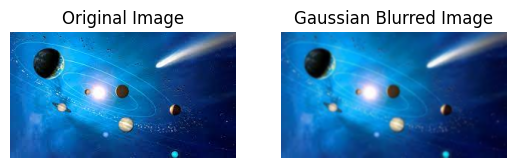

In [12]:
image = cv2.imread('sample.jpeg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
gaussian = cv2.GaussianBlur(image,(5,5),0)
plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')
plt.subplot(2,2,2)
plt.title('Gaussian Blurred Image')
plt.imshow(gaussian)
plt.axis('off')


Sharpen the image using gaussian blur and higboost filtering   

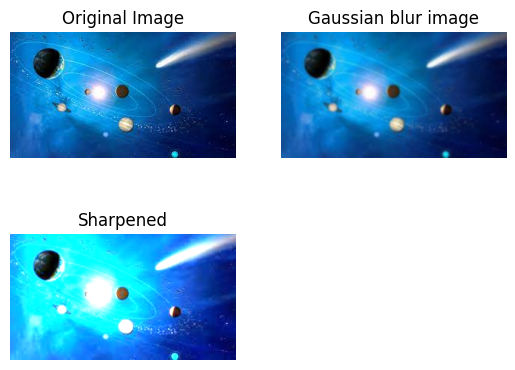

<Figure size 640x480 with 0 Axes>

In [15]:
#We need to apply unsharp masking algorithm
image = cv2.imread('sample.jpeg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
gaussian = cv2.GaussianBlur(image,(5,5),0)
sub = np.subtract(gaussian,image)
sharp_image = cv2.add(gaussian,image)
plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(2,2,2)
plt.title('Gaussian blur image')
plt.imshow(gaussian)
plt.axis('off')

plt.subplot(2,2,3)
plt.title('Sharpened')
plt.imshow(sharp_image)
plt.axis('off')

plt.show()
plt.tight_layout()

Sobel and laplacian sharpening

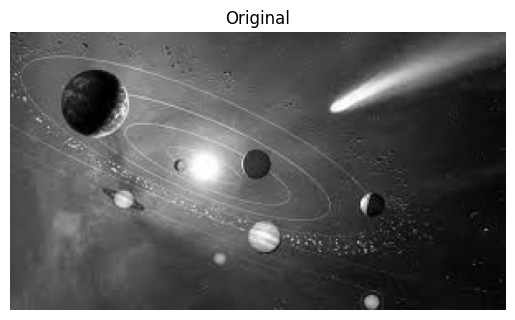

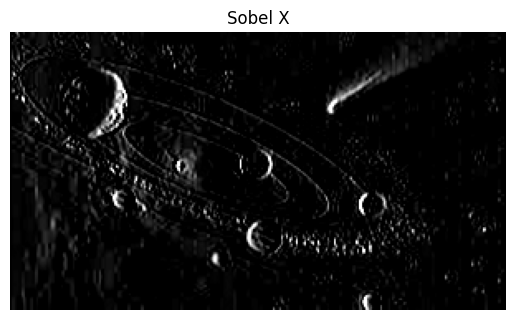

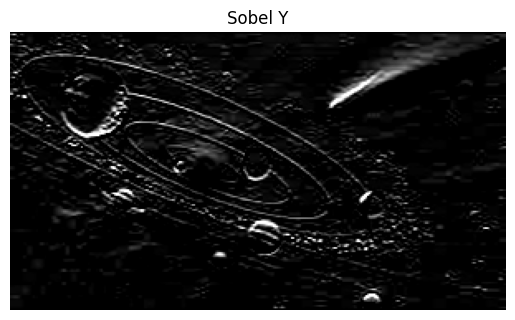

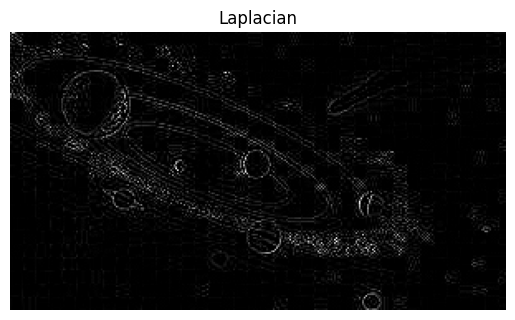

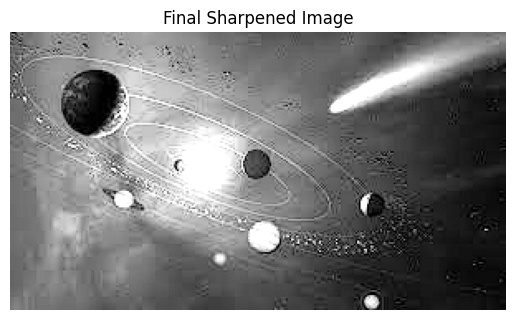

In [16]:
# Importing the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image in color
image1 = cv2.imread('sample.jpeg')

# Convert the color image to grayscale
image = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# Display the original grayscale image using plt.imshow()
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

# Perform Sobel edge detection in the x and y directions
sobelx = cv2.Sobel(image, cv2.CV_8U, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_8U, 0, 1, ksize=3)

# Convert the Sobel gradients to absolute values and scale them to 8-bit range
absgradx = cv2.convertScaleAbs(sobelx)
absgrady = cv2.convertScaleAbs(sobely)

# Combine the absolute gradients to get an approximate gradient magnitude
gradient = cv2.add(absgradx, absgrady)

# Display the Sobel gradients in x and y directions using plt.imshow()
plt.imshow(absgradx, cmap='gray')
plt.title("Sobel X")
plt.axis('off')
plt.show()

plt.imshow(absgrady, cmap='gray')
plt.title("Sobel Y")
plt.axis('off')
plt.show()

# Perform Laplacian edge detection
laplacian = cv2.Laplacian(image, cv2.CV_8U)

# Convert the Laplacian result to absolute values and scale to 8-bit range
laplacian = cv2.convertScaleAbs(laplacian)

# Display the Laplacian edge detection result using plt.imshow()
plt.imshow(laplacian, cmap='gray')
plt.title("Laplacian")
plt.axis('off')
plt.show()

# Perform image sharpening using a weighted combination of the original image and Laplacian
finalsharp = cv2.addWeighted(image, 1.5, laplacian, -0.5, 0)

# Display the final sharpened image using plt.imshow()
plt.imshow(finalsharp, cmap='gray')
plt.title("Final Sharpened Image")
plt.axis('off')
plt.show()


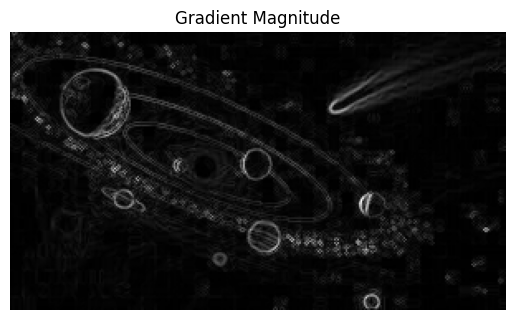

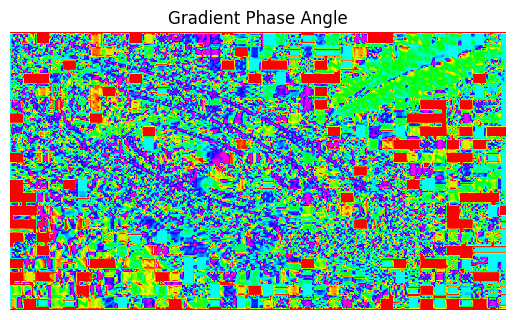

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('sample.jpeg', cv2.IMREAD_GRAYSCALE)

# Calculate gradients using Sobel in the x and y directions
gradx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=1)
grady = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=1)

# Convert gradient values to absolute values
absgradx = cv2.convertScaleAbs(gradx)
absgrady = cv2.convertScaleAbs(grady)

# Calculate gradient magnitude and phase angle
magnitude = np.sqrt(gradx**2 + grady**2)
angle = np.arctan2(grady, gradx) * (180 / np.pi) % 180

# Convert magnitude values to 8-bit scale
magnitude = cv2.convertScaleAbs(magnitude)

# Convert angle values to uint8 (0-255) for displaying as an image
angle = angle.astype(np.uint8)

# Display gradient magnitude using plt.imshow()
plt.imshow(magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')
plt.show()

# Display gradient phase angle using plt.imshow()
plt.imshow(angle, cmap='hsv')  # Using 'hsv' colormap to represent angles
plt.title('Gradient Phase Angle')
plt.axis('off')
plt.show()
